# Explore here

track    : Espresso
track    : Please Please Please
track    : Taste
track    : Bed Chem
track    : Nonsense
track    : Good Graces
track    : Feather
track    : Juno
track    : Sharpest Tool
track    : Coincidence
                                               album  \
9  {'album_type': 'album', 'artists': [{'external...   
7  {'album_type': 'album', 'artists': [{'external...   
8  {'album_type': 'album', 'artists': [{'external...   

                                             artists  disc_number  \
9  [{'external_urls': {'spotify': 'https://open.s...            1   
7  [{'external_urls': {'spotify': 'https://open.s...            1   
8  [{'external_urls': {'spotify': 'https://open.s...            1   

   duration_ms  explicit              external_ids  \
9       164202     False  {'isrc': 'USUM72405667'}   
7       223192      True  {'isrc': 'USUM72404107'}   
8       218284      True  {'isrc': 'USUM72404104'}   

                                       external_urls  \
9  {'spoti

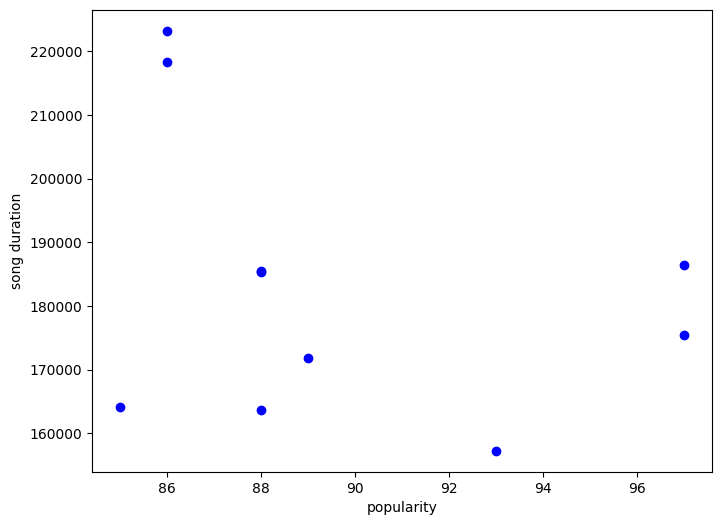

In [2]:
import os
import pandas as pd
from dotenv import load_dotenv
import spotipy
import matplotlib.pyplot as plt
from spotipy.oauth2 import SpotifyClientCredentials

# load the .env file variables
load_dotenv()

client_id = os.environ.get('CLIENT_ID')
client_secret = os.environ.get('CLIENT_SECRET')

spotify = spotipy.Spotify(auth_manager = SpotifyClientCredentials(client_id = client_id, client_secret = client_secret))

artist_id = '74KM79TiuVKeVCqs8QtB0B'

response = spotify.artist_top_tracks(artist_id)

for track in response['tracks'][:10]:
    print('track    : ' + track['name'])

tracks = response["tracks"]

tracks_df = pd.DataFrame.from_records(tracks)
tracks_df.sort_values(["popularity"], inplace = True)

print(tracks_df.head(3))

plt.figure(figsize=(8, 6))  # Optional: set the figure size
plt.scatter(tracks_df['popularity'], tracks_df['duration_ms'], color='blue', marker='o')

plt.xlabel('popularity')
plt.ylabel('song duration')

plt.show()